In [36]:
# Import additional required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import *
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
zoo = pd.read_csv(r"C:\Users\safreena\Desktop\Assignments ExcelR\KNN\Data sets\Zoo.csv")

# Print the first 5 rows of the dataframe
print(zoo.head())


  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


In [4]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
zoo.shape

(101, 18)

In [8]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [9]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


Text(0.5, 1.0, 'Histogram of Classes')

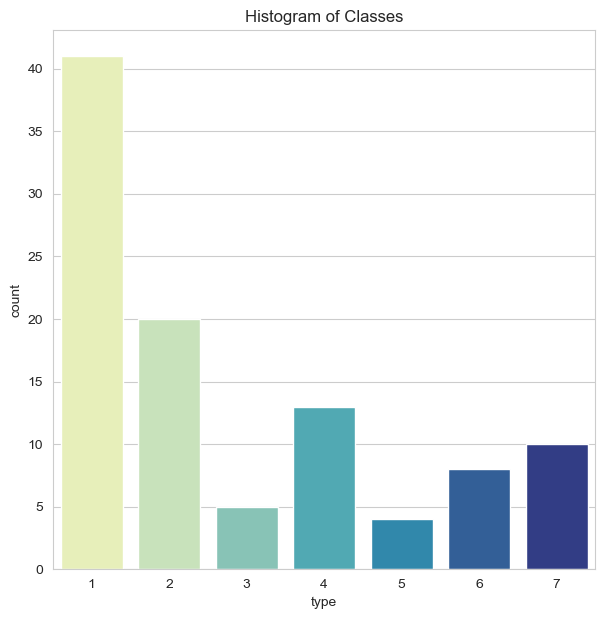

In [37]:
# Set default plot grid
sns.set_style('whitegrid')
# Plot histogram of classes
plt.rcParams['figure.figsize'] = (7,7)
sns.countplot(zoo['type'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Classes")

In [38]:
zoo['has_legs'] = np.where(zoo['legs']>0,1,0)
zoo= zoo[['animal name','hair','feathers','eggs','milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes','venomous','fins','legs','has_legs','tail','domestic','catsize','type']]
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1,1


Text(0.5, 1.0, 'Features for the Animals')

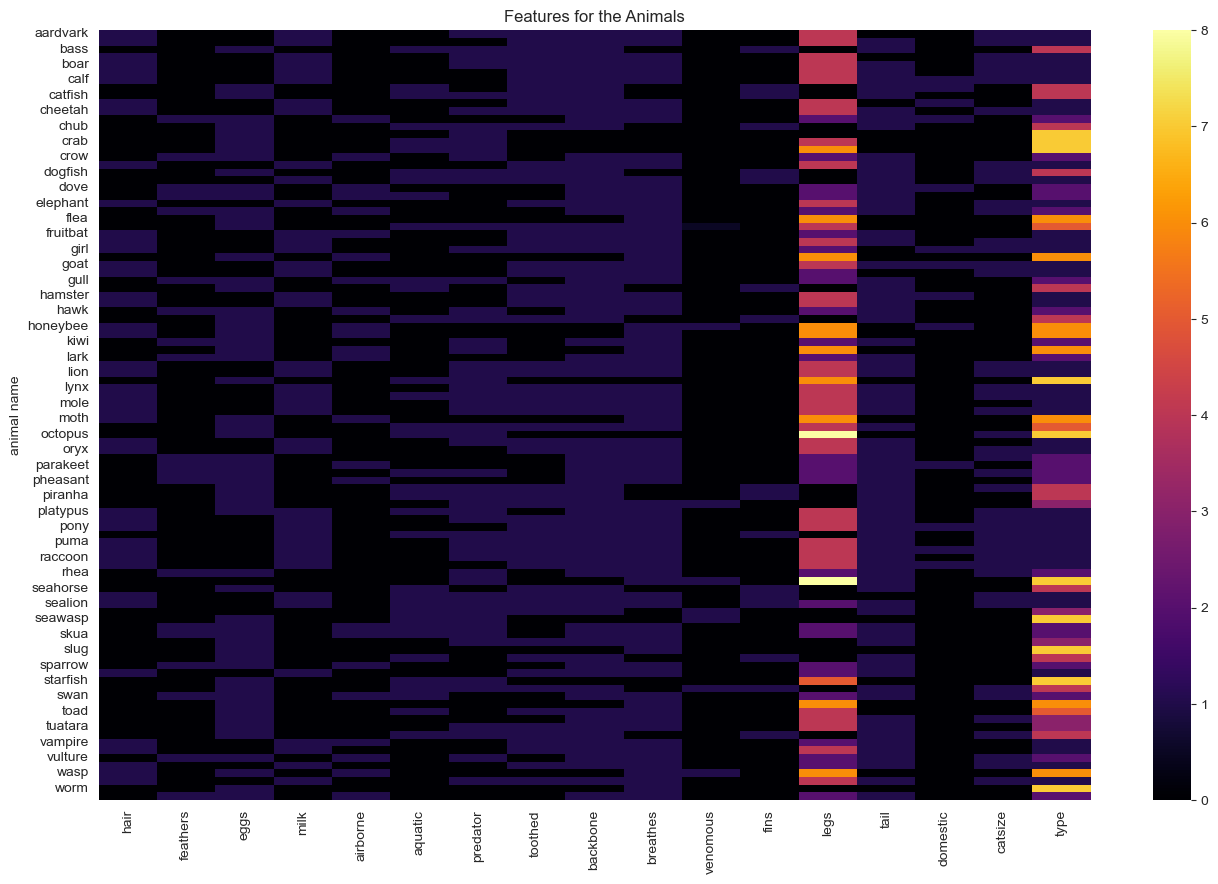

In [39]:
zoo_df_temp = zoo.drop(['has_legs'], axis=1)
zoo_df_temp = zoo_df_temp.groupby(by='animal name').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(zoo_df_temp, cmap="inferno")
ax = plt.gca()
ax.set_title("Features for the Animals")

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

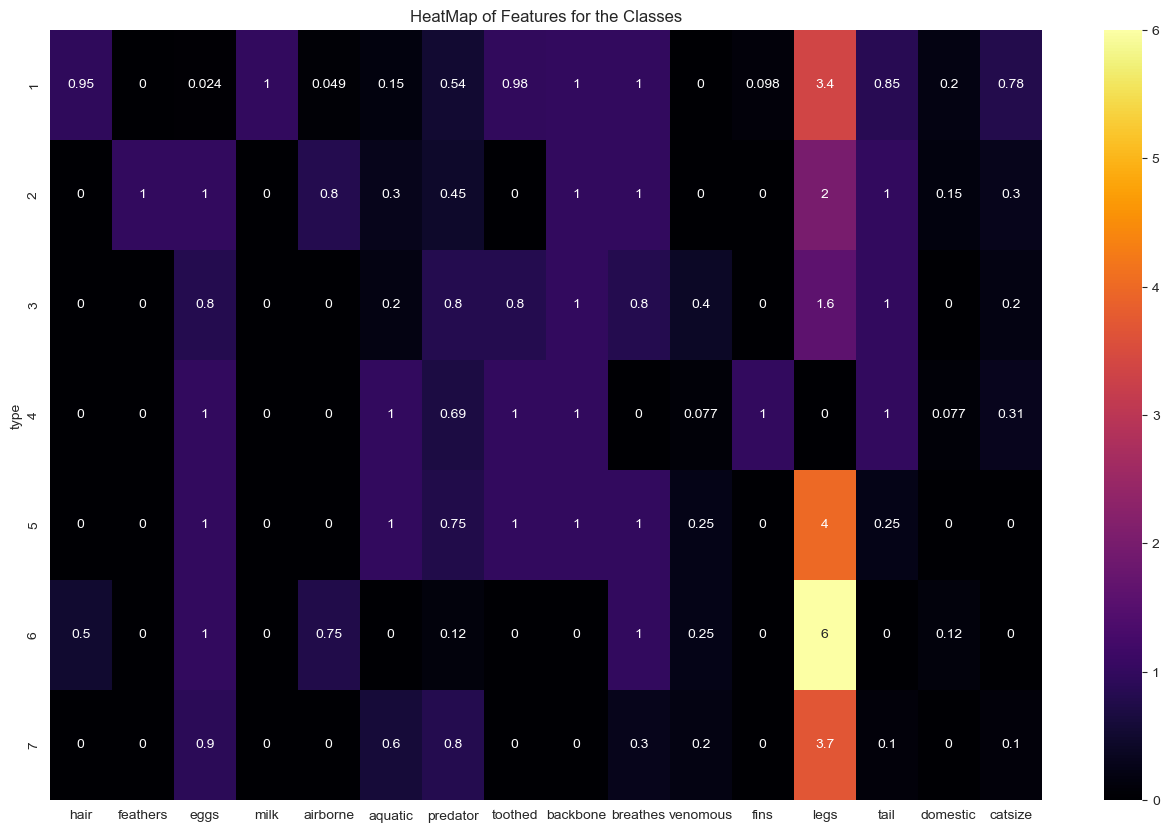

In [40]:
zoo_df_temp = zoo.drop(['has_legs'], axis=1)
zoo_df_temp = zoo_df_temp.groupby(by='type').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(zoo_df_temp, annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

In [41]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1,1


In [42]:
features = list(zoo.columns.values)
features.remove('has_legs')
features.remove('type')
features.remove('animal name')

In [43]:
X = zoo[features]
y = zoo['type']

In [44]:
# Split X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [45]:
# Fit k-nearest neighbors classifier with training sets for n = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Test and Evaluate model

In [46]:
# Run prediction
y_pred = knn.predict(X_test)

In [47]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.96        26
   macro avg       0.83      0.86      0.84        26
weighted avg       0.93      0.96      0.94        26



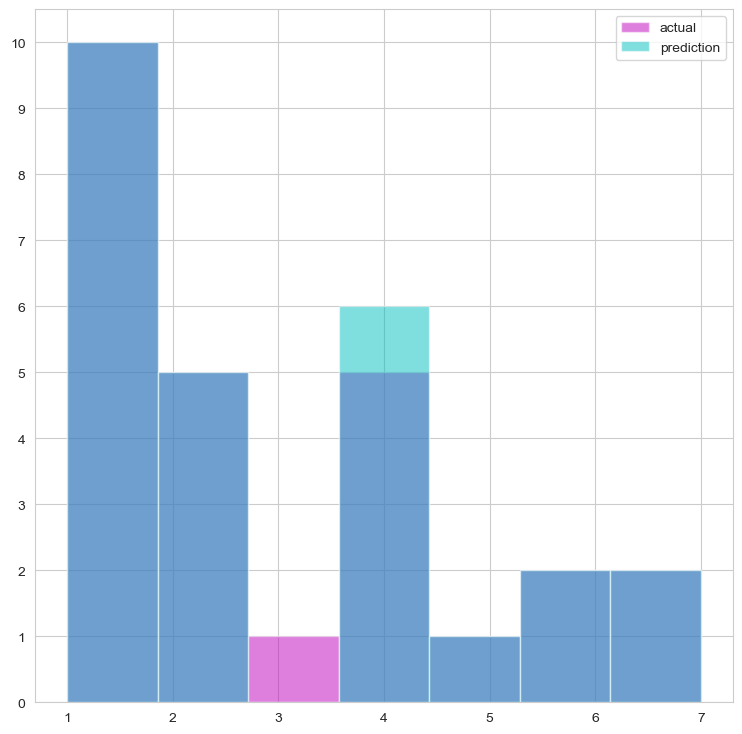

In [49]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

What this figure tells us is the total number of animals in each class according to the test data and predicted data.
We can see that the predictions matches almost all the actual animal classifications (indicated by color overlap) except for one case where the model failed to identify an animal as belonging to class 3 , and marked it as being in class 4 .

So we can see the level of accuracy for this particular classifier.

Now that we know what the model can do at n=5, we should run the model for multiple values of n to find optimal value of n with respect to this dataset.

In [50]:
# Get score for different values of n
k_list = np.arange(1, 50, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    score = cross_val_score(knn,X_train, y_train,cv=10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))
    
print("Mean Scores:")
print(mean_scores)
print("Error Rate:")
print(error_rate)

Mean Scores:
[0.9178571428571429, 0.9303571428571429, 0.8232142857142858, 0.7714285714285714, 0.7714285714285714, 0.7714285714285714, 0.7589285714285714, 0.7589285714285714, 0.7464285714285713, 0.6946428571428571, 0.6535714285714286, 0.5732142857142857, 0.5732142857142857, 0.5732142857142857, 0.5732142857142857, 0.5732142857142857, 0.5607142857142857, 0.5214285714285714, 0.5107142857142857, 0.5232142857142856, 0.48392857142857143, 0.4428571428571429, 0.41428571428571426, 0.41428571428571426, 0.41428571428571426]
Error Rate:
[0.0, 0.0, 0.038461538461538464, 0.07692307692307693, 0.11538461538461539, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.23076923076923078, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.46153846153846156, 0.46153846153846156, 0.5, 0.5, 0.6153846153846154]


## Visualization of Model Performance of Different n-Values
Create a plot of the average accuracy of the prediction model for different values of k between 1 to 50.

This is to help us better see which value of k works best with this model.

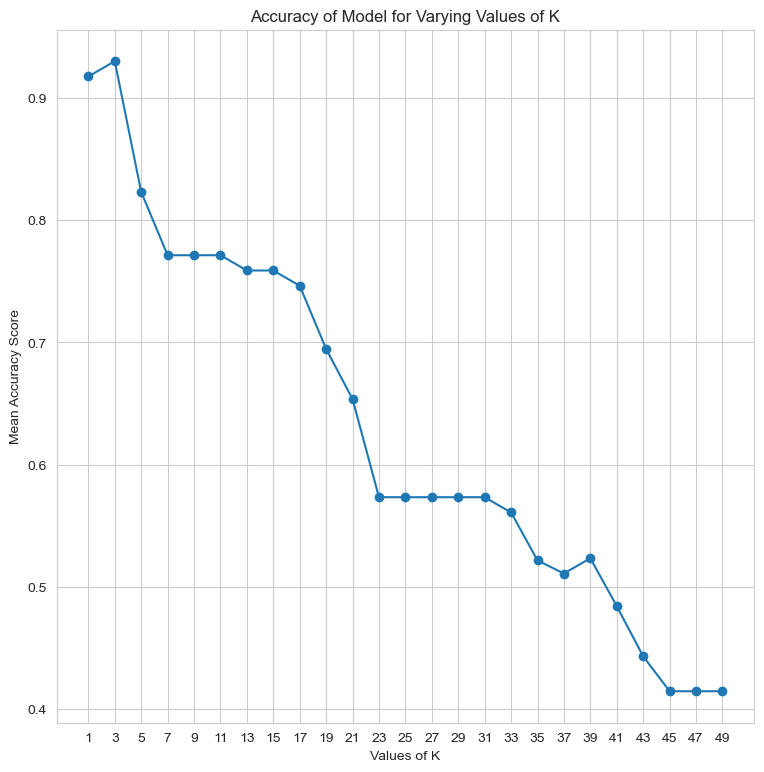

In [52]:
# Plot n values and average accuracy scores
plt.plot(k_list,mean_scores, marker='o')

# Added titles and adjust dimensions
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12,12) 
plt.show()

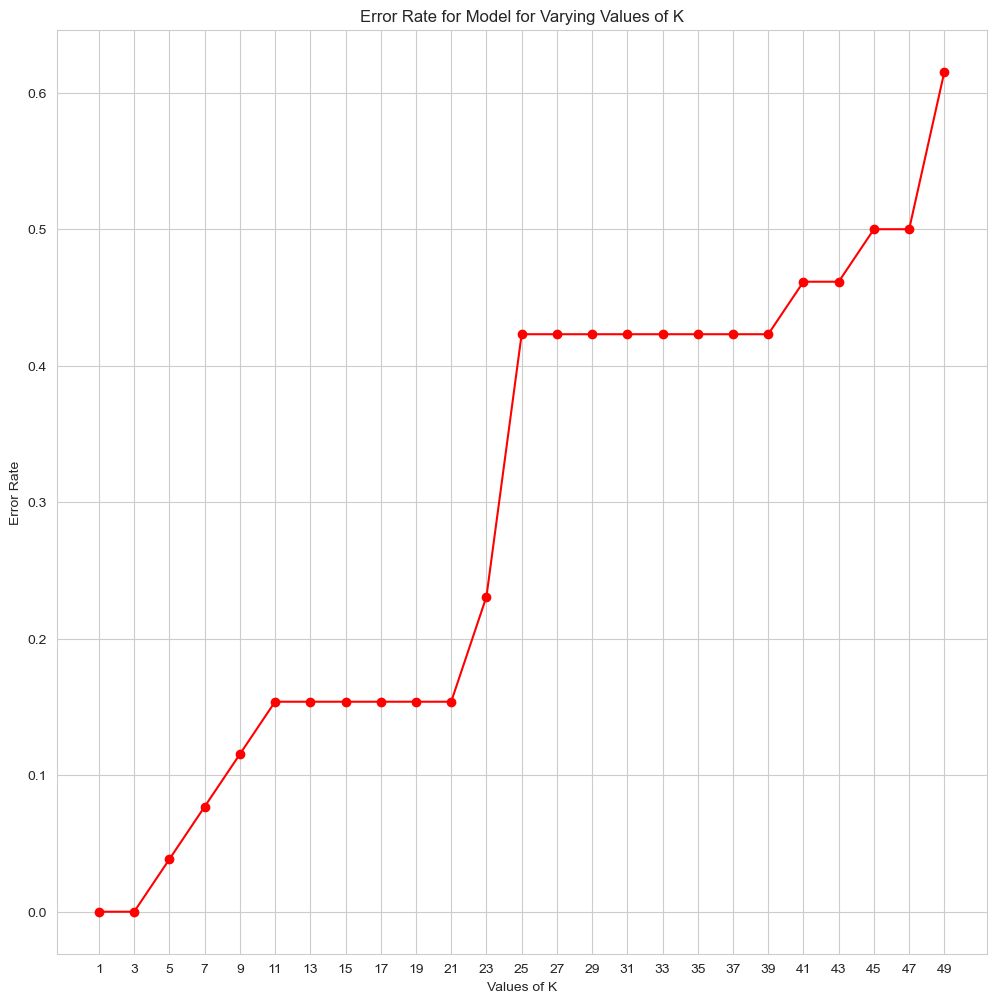

In [53]:
# Plot n values and average accuracy scores
plt.plot(k_list,error_rate, color='r', marker = 'o')

# Added titles and adjust dimensions
plt.title('Error Rate for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12,12) 

###So, we've seen how this works when we use all the features values as given.
Just for fun, let's see how this changes if we don't use the values for legs and use has_legs instead as we did when plotting our heatmap.

I'll run the exact same code as before changing nothing but using has_legs and not legs

In [54]:
# Select columns to add to X and y sets
features = list(zoo.columns.values)
features.remove('legs')
features.remove('type')
features.remove('animal name')
X2 = zoo[features]
y2 = zoo["type"]

In [55]:
# Split X and y into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state = 0)

In [56]:
# Fit k-nearest neighbors classifier with training sets for n = 5
knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X2_train, y2_train)

KNeighborsClassifier()

In [57]:
# Run prediction
y2_pred = knn2.predict(X2_test)

In [58]:
print(confusion_matrix(y2_test,y2_pred))

[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


In [59]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



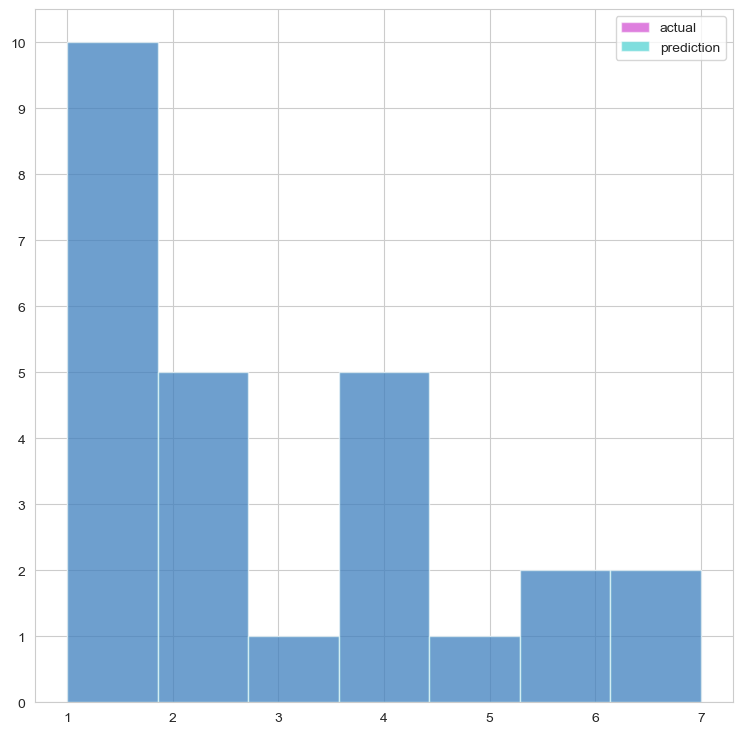

In [60]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y2_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y2_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')

plt.show()

In [61]:
# Get score for different values of n
k_list = np.arange(1, 50, 2)
mean_scores2 = []
accuracy_list2 = []
error_rate2 = []

for i in k_list:
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X2_train,y2_train)
    pred_i = knn2.predict(X2_test)
    score = cross_val_score(knn2,X2_train, y2_train,cv=10)
    mean_scores2.append(np.mean(score))
    error_rate2.append(np.mean(pred_i != y2_test))

print("Mean Scores:")
print(mean_scores)
print("Error Rate:")
print(error_rate)

Mean Scores:
[0.9178571428571429, 0.9303571428571429, 0.8232142857142858, 0.7714285714285714, 0.7714285714285714, 0.7714285714285714, 0.7589285714285714, 0.7589285714285714, 0.7464285714285713, 0.6946428571428571, 0.6535714285714286, 0.5732142857142857, 0.5732142857142857, 0.5732142857142857, 0.5732142857142857, 0.5732142857142857, 0.5607142857142857, 0.5214285714285714, 0.5107142857142857, 0.5232142857142856, 0.48392857142857143, 0.4428571428571429, 0.41428571428571426, 0.41428571428571426, 0.41428571428571426]
Error Rate:
[0.0, 0.0, 0.038461538461538464, 0.07692307692307693, 0.11538461538461539, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.23076923076923078, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.46153846153846156, 0.46153846153846156, 0.5, 0.5, 0.6153846153846154]


##Here I'll plot the original and new curves together so we can see and compare any differences.

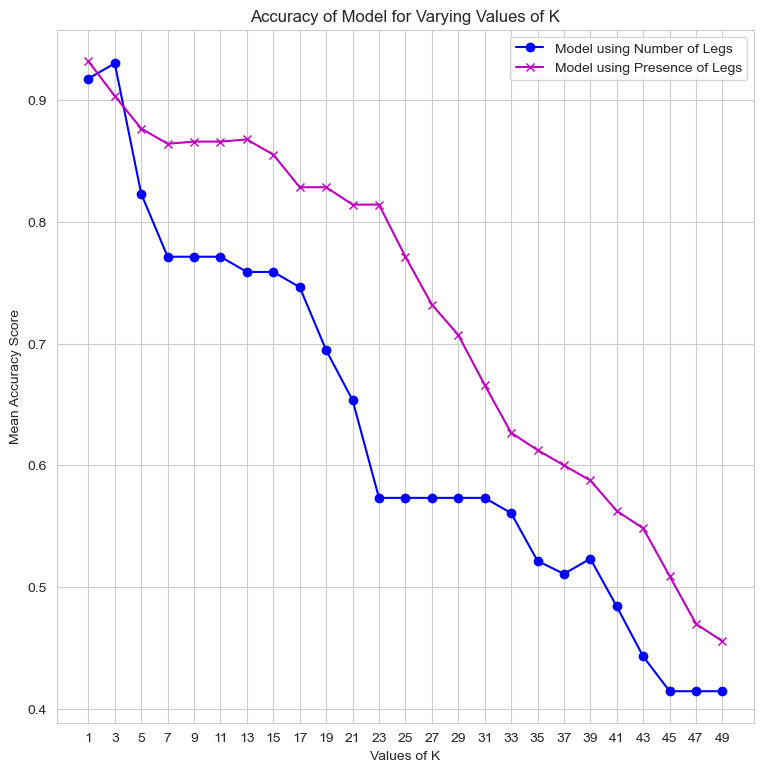

In [62]:
# Plot n values and average accuracy scores
plt.plot(k_list,mean_scores, color='b',marker='o', label='Model using Number of Legs')
plt.plot(k_list,mean_scores2, color='m',marker='x', label='Model using Presence of Legs')
# Added titles and adjust dimensions
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)
plt.legend()
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

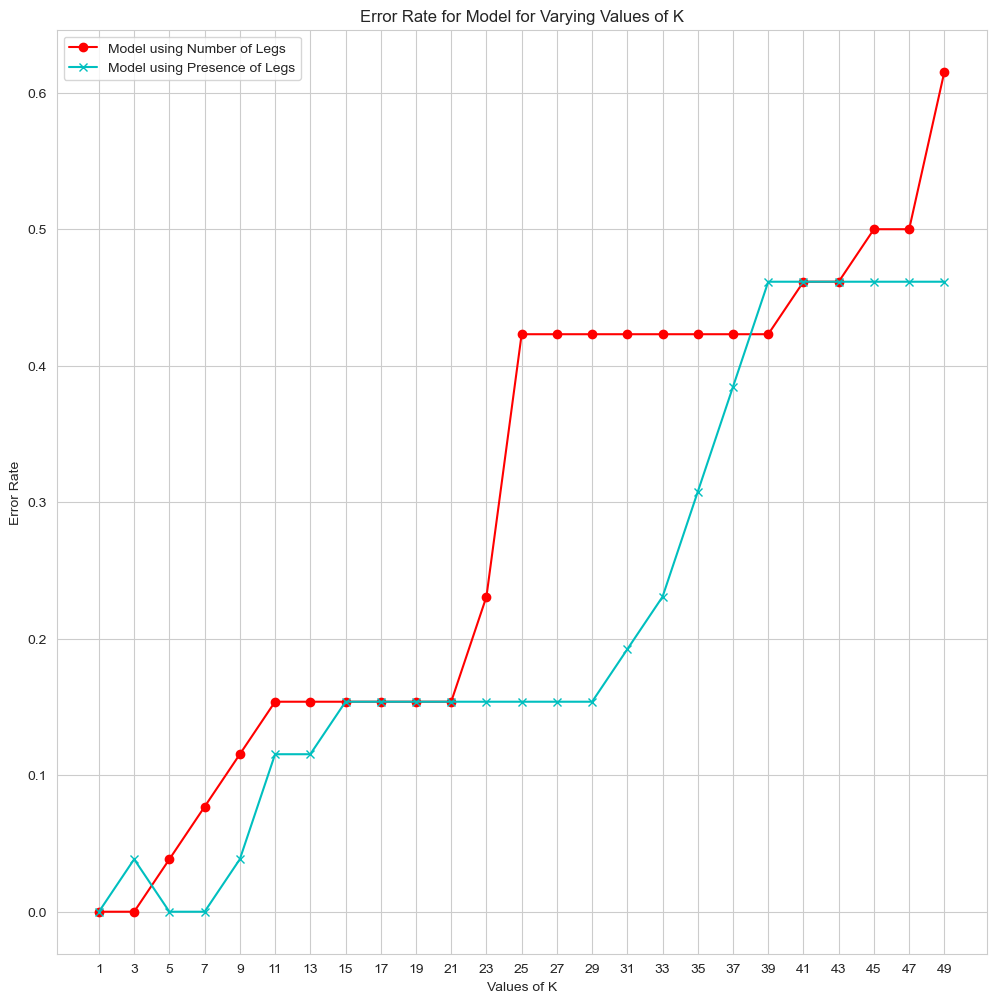

In [63]:
# Plot n values and average accuracy scores
plt.plot(k_list,error_rate, color='r', marker = 'o', label='Model using Number of Legs')
plt.plot(k_list,error_rate2, color='c', marker = 'x', label='Model using Presence of Legs')

# Added titles and adjust dimensions
plt.title('Error Rate for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.legend()
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

## Inference
So interestingly,
Replacing the feature legs with has_legs improved the accuracy of KNN models at every value where n >3
This may be due to the model taking the number of legs as a continuous, numeric data point rather than as an enumerate.